# Modelo - Upselling

## 1. Introdução

<p>
    No Notebook <code>CRM - Tratamento das Variáveis</code>, executamos as etapas de limpeza, preparação dos dados e selecionamento das features para cada uma das variáveis que faremos a previsão.
</p>

### 1.1 Objetivo

<p>
    Iremos criar um modelo de classificação que faz a previsão da variável Upselling, ou seja, se o cliente tem propensão para comprar upgrades ou adicionais com maior margem de lucro quando apresentados. Testaremos dois modelos, Random Forest e Gradient Boost, o que tiver melhor desempenho, receberá um Tuning para melhorar seu números.
</p>

## 2. Bibliotecas e Dataset

### 2.1 Importando as bibliotecas

In [3]:
# Manipulação dos dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos de Classifição
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Métricas de avaliação
from sklearn.metrics import roc_auc_score, accuracy_score

# Seleção
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

#### Settings ####
pd.options.display.float_format = "{:,.3f}".format
plt.style.use("classic")
# plt.rcParams("figure.figsize") = [10,5]
%load_ext nb_black

<IPython.core.display.Javascript object>

### 2.2 Carregando e visualizando o dataset

In [5]:
features_u = pd.read_csv("features_train_upselling.csv")
upselling = pd.read_csv("orange_small_train_upselling.labels", header=None)
features_u.head()

,Var211_L84s,Var211_Mtgm,Var153,Var28,Var57,Var73,Var113,Var38,Var81,Var133,...,Var206_G_zk,Var212_nlbpV6E,Var212_N7XB,Var192_YddrjIQ5Ph,Var192_O8Zr4Rdc_a,Var221_JIiEFBU,Var193_MJdP52puUMWhmExsNdlkGDbNTFln2Eg,Var212_cOJGGr4F_wga1,Var212_I6KzrtUCei,Var193_5QKIjwyXr4MCZTEp7uAkS8PtBLcn
0,1,0,"1,812,252.000",166.560,4.077,36.000,"117,625.600","3,570.000","7,333.110","1,212,385.000",...,0,0,0,0,0,0,0,0,0,0
1,1,0,"10,439,160.000",353.520,5.408,26.000,"-356,411.600","4,764,966.000","151,098.900","4,136,430.000",...,0,0,0,0,0,0,0,0,0,0
2,1,0,"9,826,360.000",220.080,6.600,130.000,"405,104.000","5,883,894.000","16,211.580","3,478,905.000",...,0,0,0,0,0,0,0,0,0,0
3,0,1,0.000,22.080,1.988,12.000,"-275,703.600",0.000,"103,084.053",0.000,...,0,0,0,0,0,0,0,0,0,0
4,1,0,"644,836.000",200.000,4.552,82.000,"10,714.840",0.000,"37,423.500","150,650.000",...,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

### 2.3 X e y

#### Iremos separar as variáveis que farão a previsão, da variável target, que é onde transmite se o cliente cancelou ou não

In [8]:
X = features_u.iloc[:, :-1].values
y = upselling.values.ravel()

<IPython.core.display.Javascript object>

---------------------------------------------

#### Como o dataset já esta pronto, vamos para o fase de divisão, onde reservaremos 80% dos dados para treino, e 20% para o teste

### 3. Divisão entre treino e teste

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=1
)

<IPython.core.display.Javascript object>

In [10]:
X_train.shape, X_test.shape

((40000, 645), (10000, 645))

<IPython.core.display.Javascript object>

In [11]:
y_train.shape, y_test.shape

((40000,), (10000,))

<IPython.core.display.Javascript object>

-------------------------------------------------------

#### Agora iremos testar os dois modelos, com os parâmetros default do classificador, e escolheremos o que tiver melhor desempenho.

#### A métrica que usaremos será o AUC, que mede a área sob a curva ROC, que é uma excelente métrica para avaliar um modelo de classificação

## 4. Random Forest Classifier

### 4.1 - Média dos testes

#### Faremos uma função para verificar a média dos testes, através de um cross validation

In [12]:
def rfc_test(X_train, y_train, n_estimators=100, cv=10):
    rfc = RandomForestClassifier(n_estimators=n_estimators)
    cv_scores = cross_val_score(
        rfc, X_train, y_train, scoring="roc_auc", cv=cv, n_jobs=-1
    )
    print(f"Média dos testes: {cv_scores.mean()}")

<IPython.core.display.Javascript object>

In [13]:
%%time
rfc_test(X_train,y_train, 100, 10)

Média dos testes: 0.7001942220516836
CPU times: total: 281 ms
Wall time: 2min 3s


<IPython.core.display.Javascript object>

## 5. Gradient Boosting

### 5.1 Média dos testes

In [14]:
def gbc_test(X_train, y_train, n_estimators=100, learning_rate=0.1, cv=10):
    gbc = GradientBoostingClassifier(
        n_estimators=n_estimators, learning_rate=learning_rate
    )
    cv_scores = cross_val_score(
        gbc, X_train, y_train, scoring="roc_auc", cv=cv, n_jobs=-1
    )
    print(f"Média dos testes: {cv_scores.mean()}")

<IPython.core.display.Javascript object>

In [15]:
%%time
gbc_test(X_train, y_train, 100, 0.1, 10)

Média dos testes: 0.7489832767929896
CPU times: total: 312 ms
Wall time: 12min 17s


<IPython.core.display.Javascript object>

-----------------------------------


## 6. Otimização do modelo vencedor

#### Podemos notar que o modelo vencedor foi o Gradiente Bosting com 0.74, já o Random Forest teve a média de 0.70

### 6.1 Como faremos o Tuning do modelo

#### Faremos o otimização do modelo, parâmetro por parâmetro, e guarderemos os resultados do melhores em variáveis e no final termemos o modelo considerado ideal

#### A função optimize, treinará o modelo com os parâmetros indicados por nós, e retornará algumas informações, como o melhor score, o modelo, e os melhores parâmetros, onde guardaremos em variáveis.

In [16]:
def optimize(
    n_estimators,
    learning_rate,
    min_samples_split,
    min_samples_leaf,
    max_depth,
    max_features,
    subsample,
    params,
    cv=10,
):

    gbc = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_depth=max_depth,
        max_features=max_features,
        subsample=subsample,
    )
    grid_search = GridSearchCV(
        estimator=gbc, param_grid=params, scoring="roc_auc", n_jobs=-1, cv=cv
    )

    grid_search.fit(X_train, y_train)
    result = grid_search.cv_results_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(best_params, best_score)

    return gbc, best_params, best_score

<IPython.core.display.Javascript object>

In [17]:
# Variáveis para coletar os resultados

models = np.array([])
opt_params = dict()
scores = np.array([])

<IPython.core.display.Javascript object>

### 6.2 Primeiro Modelo - n_estimators

In [18]:
# Parâmetros
learning_rate = 0.1
n_estimators = None
max_depth = 8
min_samples_split = 250
min_samples_leaf = 20
max_features = "sqrt"
subsample = 0.8

params = {"n_estimators": range(50, 151, 10)}

<IPython.core.display.Javascript object>

In [19]:
gbc, opt_param, score = optimize(
    n_estimators=n_estimators,
    learning_rate=learning_rate,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    max_depth=max_depth,
    max_features=max_features,
    subsample=subsample,
    params=params,
    cv=5,
)

{'n_estimators': 110} 0.7453819513840797


<IPython.core.display.Javascript object>

In [20]:
# Atualizando as variáveis com os resultados
models = np.append(models, gbc)
opt_params = {**opt_params, **opt_param}
scores = np.append(scores, score)

<IPython.core.display.Javascript object>

____________________________________________

### 6.3 Segundo Modelo - max_depth e min_samples_split

In [21]:
n_estimators = opt_params["n_estimators"]
max_depth = None
min_samples_split = None
min_samples_leaf = 20
max_features = "sqrt"
subsample = 0.8

params = {"max_depth": range(3, 12, 2), "min_samples_split": range(150, 401, 50)}

<IPython.core.display.Javascript object>

In [22]:
%%time
gbc, opt_param, score = optimize(n_estimators=n_estimators, 
                                 learning_rate=learning_rate, 
                                 min_samples_split=min_samples_split, 
                                 min_samples_leaf=min_samples_leaf,
                                 max_depth=max_depth, 
                                 max_features=max_features, 
                                 subsample=subsample,
                                 params=params,
                                 cv=5)

{'max_depth': 3, 'min_samples_split': 250} 0.7478436257839536
CPU times: total: 8.05 s
Wall time: 14min 16s


<IPython.core.display.Javascript object>

In [23]:
# Atualizando as variáveis com os resultados
models = np.append(models, gbc)
opt_params = {**opt_params, **opt_param}
scores = np.append(scores, score)

<IPython.core.display.Javascript object>

---------------------------------

### 6.4 Terceiro Modelo - min_samples_leaf

In [24]:
max_depth = opt_params["max_depth"]
min_samples_split = opt_params["min_samples_split"]
min_samples_leaf = None

params = {"min_samples_leaf": range(25, 65, 5)}

<IPython.core.display.Javascript object>

In [25]:
%%time
gbc, opt_param, score = optimize(n_estimators=n_estimators, 
                                 learning_rate=learning_rate, 
                                 min_samples_split=min_samples_split, 
                                 min_samples_leaf=min_samples_leaf,
                                 max_depth=max_depth, 
                                 max_features=max_features, 
                                 subsample=subsample,
                                 params=params,
                                 cv=5)

{'min_samples_leaf': 40} 0.7466809022337787
CPU times: total: 8.05 s
Wall time: 1min 56s


<IPython.core.display.Javascript object>

In [26]:
# Atualizando as variáveis com os resultados
models = np.append(models, gbc)
opt_params = {**opt_params, **opt_param}
scores = np.append(scores, score)

<IPython.core.display.Javascript object>

------------------------------------------

### 6.5 Quarto Modelo - max_features

In [27]:
min_samples_leaf = opt_params["min_samples_leaf"]
max_features = None

params = {"max_features": (range(21, 31, 1))}

<IPython.core.display.Javascript object>

In [28]:
%%time
gbc, opt_param, score = optimize(n_estimators=n_estimators, 
                                 learning_rate=learning_rate, 
                                 min_samples_split=min_samples_split, 
                                 min_samples_leaf=min_samples_leaf,
                                 max_depth=max_depth, 
                                 max_features=max_features, 
                                 subsample=subsample,
                                 params=params,
                                 cv=5)

{'max_features': 29} 0.7468153448937657
CPU times: total: 8.44 s
Wall time: 2min 23s


<IPython.core.display.Javascript object>

In [29]:
# Atualizando as variáveis com os resultados
models = np.append(models, gbc)
opt_params = {**opt_params, **opt_param}
scores = np.append(scores, score)

<IPython.core.display.Javascript object>

--------------------------

### 6.6 Quinto Modelo - subsample

In [30]:
max_features = opt_params["max_features"]
subsample = None

params = {"subsample": np.append(np.arange(0.6, 1, 0.05), 1)}

<IPython.core.display.Javascript object>

In [31]:
%%time
gbc, opt_param, score = optimize(n_estimators=n_estimators, 
                                 learning_rate=learning_rate, 
                                 min_samples_split=min_samples_split, 
                                 min_samples_leaf=min_samples_leaf,
                                 max_depth=max_depth, 
                                 max_features=max_features, 
                                 subsample=subsample,
                                 params=params,
                                 cv=5)

{'subsample': 0.8000000000000002} 0.7469144258537508
CPU times: total: 7.91 s
Wall time: 2min 22s


<IPython.core.display.Javascript object>

In [32]:
# Atualizando as variáveis com os resultados
models = np.append(models, gbc)
opt_params = {**opt_params, **opt_param}
scores = np.append(scores, score)

<IPython.core.display.Javascript object>

----------------------------------

### 6.7 Sexto Modelo - learning_rate

#### Criaremos uma nova função para obter o melhor learning_rate

In [33]:
def optimize2(
    n_estimators,
    learning_rate,
    min_samples_split,
    min_samples_leaf,
    max_depth,
    max_features,
    subsample,
    cv=5,
):

    gbc = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_depth=max_depth,
        max_features=max_features,
        subsample=subsample,
    )

    cv_scores = cross_val_score(
        gbc, X_train, y_train, scoring="roc_auc", cv=cv, n_jobs=-1
    )
    score = cv_scores.mean()
    plt.plot(np.append(scores, score))
    plt.title(f"n_estimators = {n_estimators} / learning rate = {learning_rate}")

    return gbc, score

<IPython.core.display.Javascript object>

In [34]:
subsample = opt_params["subsample"]
learning_rate /= 2
n_estimators *= 2

<IPython.core.display.Javascript object>

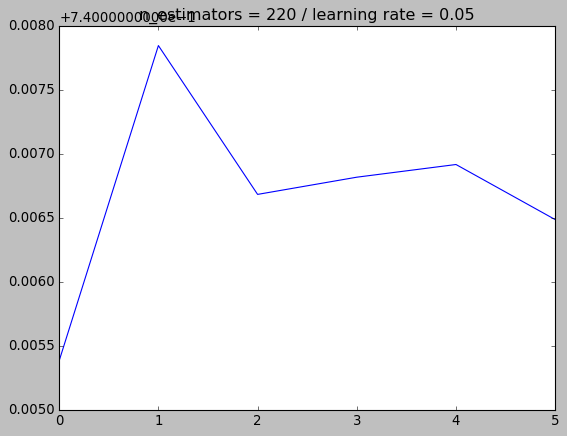

<IPython.core.display.Javascript object>

In [35]:
gbc, score = optimize2(
    n_estimators=n_estimators,
    learning_rate=learning_rate,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    max_depth=max_depth,
    max_features=max_features,
    subsample=subsample,
    cv=5,
)

In [36]:
# Atualizando as variáveis com os resultados
models = np.append(models, gbc)
scores = np.append(scores, score)

<IPython.core.display.Javascript object>

-------------------

### 6.8 Sétimo Modelo - aprimorando learning_rate 

In [37]:
learning_rate /= 5
n_estimators *= 5

<IPython.core.display.Javascript object>

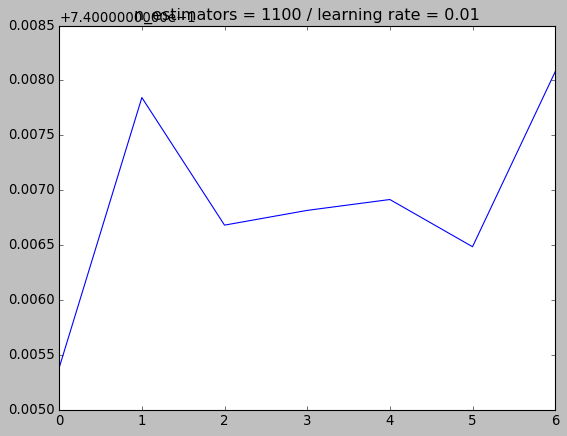

<IPython.core.display.Javascript object>

In [38]:
gbc, score = optimize2(
    n_estimators=n_estimators,
    learning_rate=learning_rate,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    max_depth=max_depth,
    max_features=max_features,
    subsample=subsample,
    cv=5,
)

In [39]:
# Atualizando as variáveis com os resultados
models = np.append(models, gbc)
scores = np.append(scores, score)

<IPython.core.display.Javascript object>

-----------------------------------

## 7. Melhor Modelo

In [40]:
print(f"Modelo com o melhor desempenho: {scores.argmax()} -- AUC: {max(scores)}")

Modelo com o melhor desempenho: 6 -- AUC: 0.7480789918716486


<IPython.core.display.Javascript object>

### 7.1 Visualizando os melhores parâmetros

In [43]:
best_model = models[scores.argmax()]

<IPython.core.display.Javascript object>

In [44]:
best_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_features=29,
                           min_samples_leaf=40, min_samples_split=250,
                           n_estimators=1100, subsample=0.8000000000000002)

<IPython.core.display.Javascript object>

### 7.2 Resultado da predição

In [45]:
y_pred_probs = best_model.predict_proba(X_test)

roc_auc_score(y_test, y_pred_probs[:, 1])

0.7570549802414208

<IPython.core.display.Javascript object>

-------------------------

-------------------------